
## Step 1: Introduction to the Iris Data Set¶

For this series of lectures, we will be using the famous Iris flower data set.

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

Notebook [link](https://github.com/jmportilla/Udemy---Machine-Learning/blob/master/Multi-Class%20Classification.ipynb)

In [29]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [30]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [31]:
iris = load_iris()

In [32]:
X = iris.data

Y = iris.target

In [33]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [34]:
iris_data = DataFrame(X, columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

In [35]:
iris_target = DataFrame(Y, columns=['Species'])

In [36]:
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolour'
    else:
        return 'Virginica'

In [37]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [38]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [39]:
iris = pd.concat([iris_data,iris_target],axis=1) # merging both dataframes together

In [40]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa



## Step 4: Data Visualization Analysis

Let's do some quick visualizations of the data. We can actually do a very broad and quick birds eye view with seaborn's pairplot.

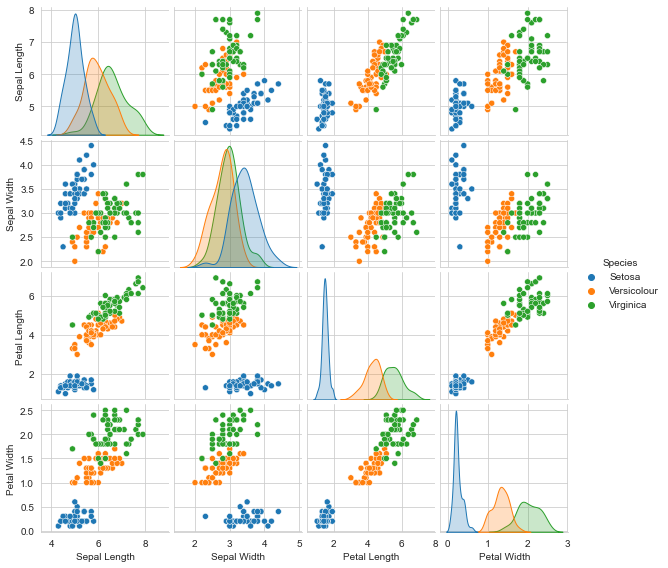

In [41]:
sns.pairplot(iris, hue='Species',height=2)

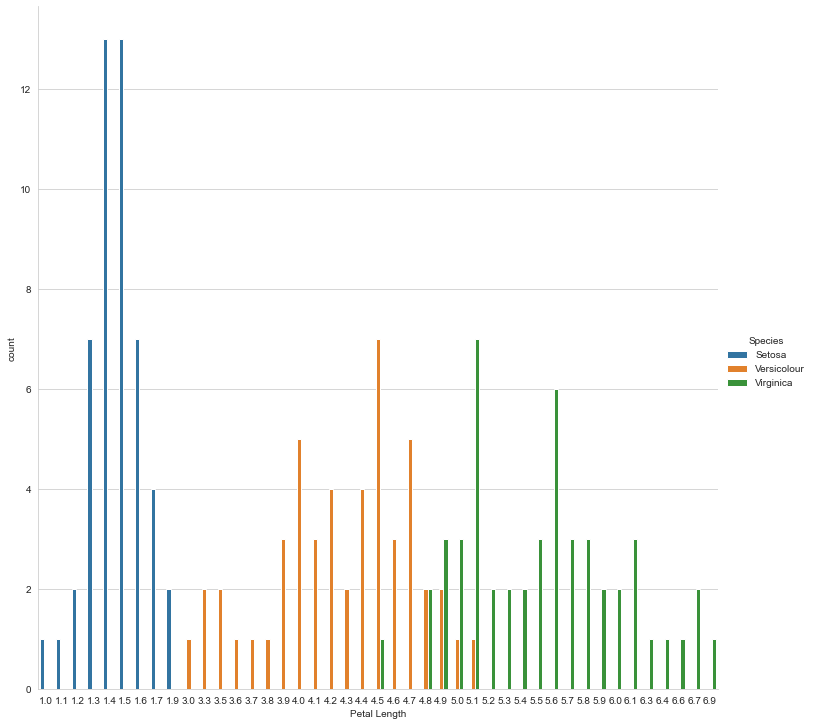

In [42]:
sns.catplot(x='Petal Length',data=iris,hue='Species',kind='count',height=10)

In [43]:
# Import Scikit Learn Log Reg
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [44]:
logreg = LogisticRegression() # creating model

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4,random_state=3) # creating training and test sets

In [45]:
logreg.fit(X_train,Y_train) # training our model

LogisticRegression()

In [46]:
from sklearn import metrics

In [47]:
Y_pred = logreg.predict(X_test) # taking features and trying to predict the targets

In [48]:
print(metrics.accuracy_score(Y_test,Y_pred)) # you can check the graphs from before to see if this prediction fits or not. You learn this with experience and time, by knowing your data.

0.9666666666666667



## Step 6: K-Nearest Neighbors

Let's start with a basic overview of the [K-Nearest Neighbors Algorithm](http://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm). The premise of the algorithm is actually quite simple. Given an object to be assigned to a class in a feature space, select the class that is "nearest" to the negihbors in the training set. This 'nearness" is a distance metric, which is usually a Euclidean distance.

The k-nearest neighbor (kNN) algorithm is very well explained in the following two videos. The [first](https://www.youtube.com/watch?v=UqYde-LULfs) one is a quick overall explanation and the second one is an [MIT OpenCourse Lecture](https://www.youtube.com/watch?v=09mb78oiPkA) on the topic. I encourage you to check them both out. Following the videos I'll have an in Notebook explanation of the algorithm.

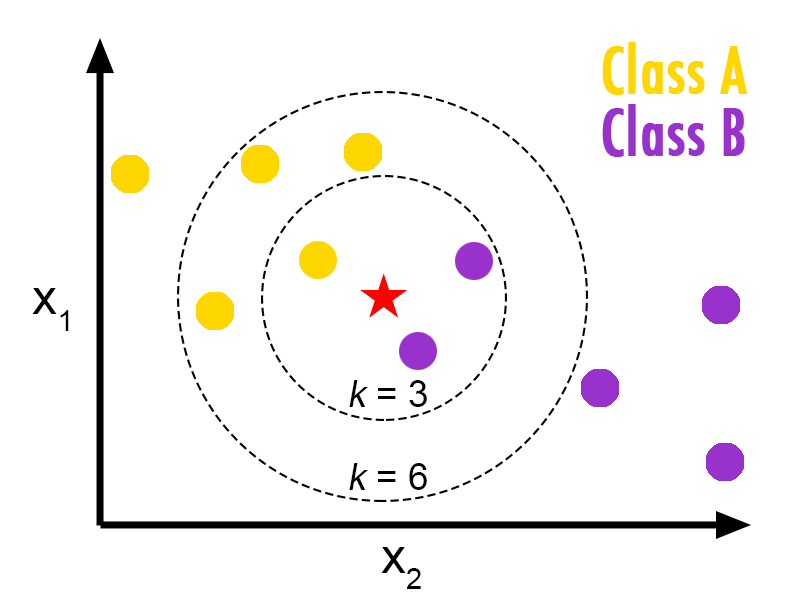

In [49]:
from IPython.display import Image
Image('http://bdewilde.github.io/assets/images/2012-10-26-knn-concept.png',width=400, height=300)

Imagine we have two Classes in our training set, A and B. Then we have to classify a new data point in our testing data, we represent this as a red star. Now we just expand a specific distance away from our feature space until we hit k number of other data points. In the figure above you can see the differences between various k values. An important thing to note, for a binary classification using this method, we must choose an odd number for k, to avoid the case of a "tied" distance between two classes.

## Step 7: kNN with SciKit Learn

Let's go ahead and see kNN Algorithm in action with SciKit Learn and our Iris dataset!

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors=6) # k = 6

In [52]:
# train our data
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [53]:
y_pred = knn.predict(X_test)

In [54]:
print(metrics.accuracy_score(Y_test,Y_pred)) # 96% accuracy

0.9666666666666667


In [55]:
knn = KNeighborsClassifier(n_neighbors=1) # k = 1

In [56]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [57]:
Y_pred = knn.predict(X_test)

In [58]:
print(metrics.accuracy_score(Y_test,Y_pred)) # 96% accuracy

0.9666666666666667


In [59]:
# Which one is better to use? (resources at the bottom)
k_range = range(1,21)

accuracy = []

In [60]:
for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)

    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

Text(0, 0.5, 'Testing Accuracy')

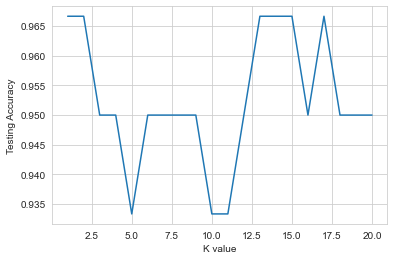

In [61]:
plt.plot(k_range,accuracy)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')

## Step 8: Conclusion

We've learned how to perform Multi-Class Classification using two great techniques, Logistic Regression and k-Nearest Neighbors.

Here are several more resources for you to Explore:

1.) [Wikipedia on Multiclass Classification](https://en.wikipedia.org/wiki/Multiclass_classification)

2.) [MIT Lecture Slides on MultiClass Classification](https://www.mit.edu/~9.520/spring09/Classes/multiclass.pdf)

3.) [Sci Kit Learn Documentation](https://scikit-learn.org/stable/modules/multiclass.html)

4.) [DataRobot on Classification Techniques](https://www.datarobot.com/blog/classification-with-scikit-learn/)